In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
from imutils import paths

In [4]:
#Data visualization
#training set
data_train_def=list(paths.list_images("D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective")) 
data_train_nondef=list(paths.list_images("D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Non defective"))
#testing set
data_test_def=list(paths.list_images("D:/Final main project/dataset/Railway Track Fault Detection Updated/Test/Defective"))
data_test_nondef=list(paths.list_images("D:/Final main project/dataset/Railway Track Fault Detection Updated/Test/Non defective"))
#validation set
data_valid_def=list(paths.list_images("D:/Final main project/dataset/Railway Track Fault Detection Updated/Validation/Defective"))
data_valid_nondef=list(paths.list_images("D:/Final main project/dataset/Railway Track Fault Detection Updated/Validation/Non defective"))

In [5]:
data_train_def

['D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective\\131004959_171473721383413_8222187747086021011_n.jpg',
 'D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective\\131051004_382613492830631_1306891331783850055_n.jpg',
 'D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective\\131065180_999185033824671_7735147288489715620_n.jpg',
 'D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective\\131084537_190751489449739_279862595635733772_n.jpg',
 'D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective\\131092897_149705809860659_8798464983059531038_n.jpg',
 'D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective\\131098429_134147575143001_1246437012995704959_n.jpg',
 'D:/Final main project/dataset/Railway Track Fault Detection Updated/Train/Defective\\131129946_140815574232570_8925999503657494497_n.jpg',
 'D:/Final mai

In [6]:
#size of dataset - train,test,valid
#type(data_train_def)
print(len(data_train_def))
print(len(data_train_nondef))
print(len(data_test_def))
print(len(data_test_nondef))
print(len(data_valid_def))
print(len(data_valid_nondef))

149
150
11
11
31
31


In [7]:
#Visualizing 5 images
count=0
for i in data_train_def:
    count+=1
    image=cv2.imread(i)
    cv2.imshow("Defective Track - Training set",image)
    
    cv2.waitKey()
    if(count>=5):
        break
cv2.destroyAllWindows()

In [8]:
#preprocessing - Data Augmentation

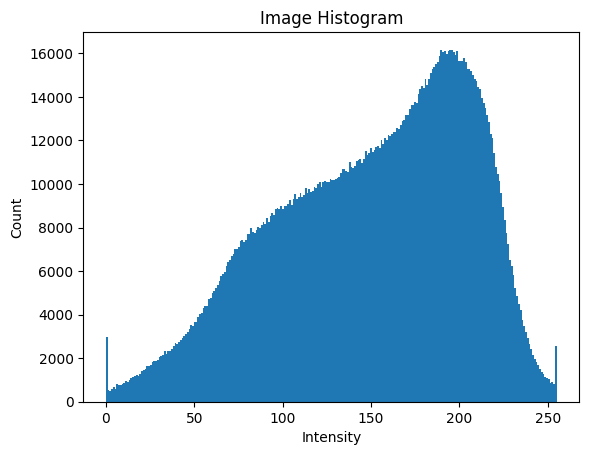

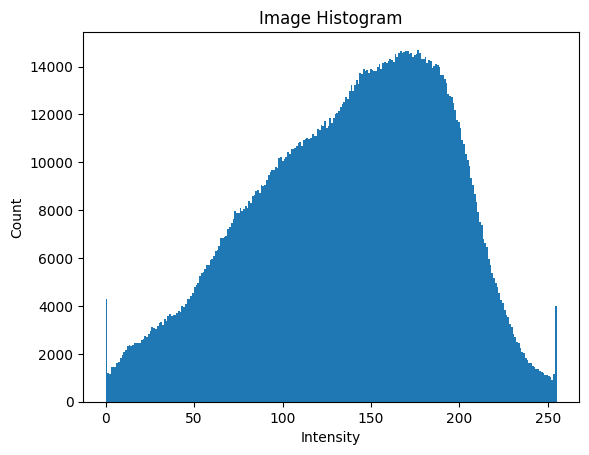

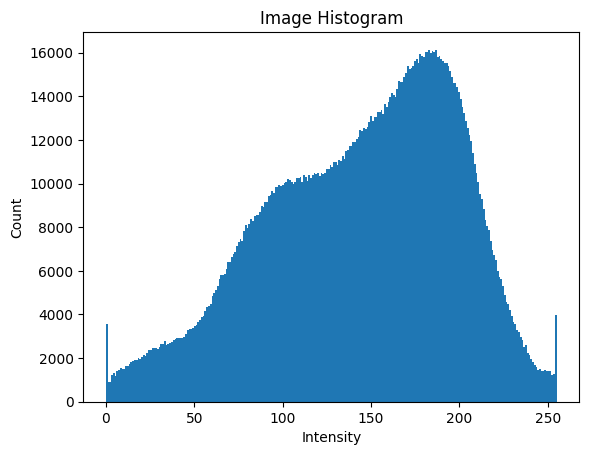

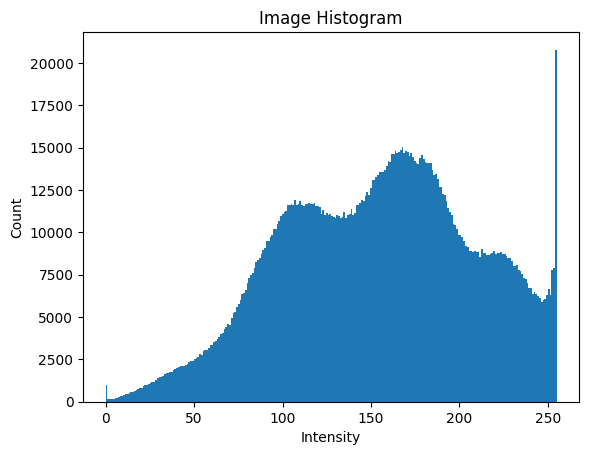

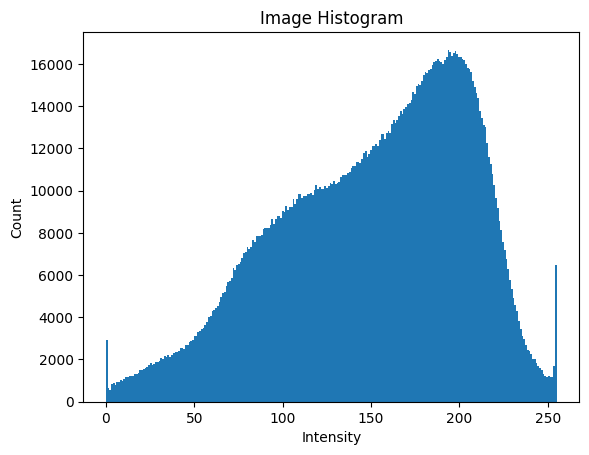

In [9]:
#image histogram - Intensity range ~ (0,250)
#training set
c=0
from skimage import io
for im in data_train_def:
    c+=1
    hist_image = io.imread(im)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.title("Image Histogram")
    ax = plt.hist(hist_image.ravel(), bins = 256)
    plt.show()
    if(c>=5):
        break

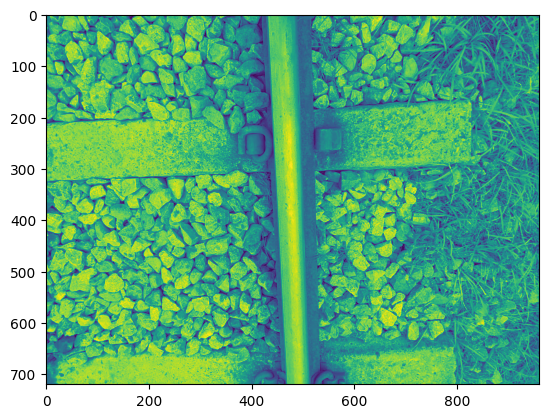

In [10]:
#img_gr=plt.imread(data_train_def[0])
img_gr=cv2.imread(data_train_def[0])
img_gr=cv2.cvtColor(img_gr,cv2.COLOR_BGR2GRAY)
img_gr=np.float32(img_gr) #vectorization
plt.imshow(img_gr)

In [11]:
print(img_gr)

[[ 94. 107.  81. ...  62.  86. 108.]
 [101. 100. 104. ...  64.  80.  99.]
 [115. 107. 133. ...  95.  95. 127.]
 ...
 [ 87.  93.  91. ...  61.  91. 140.]
 [ 86.  90.  89. ...  98.  84.  99.]
 [ 86.  86.  87. ... 130.  99.  91.]]


In [12]:
#x_train_def=np.float32(data_train_def[0])
'''X_train_grayscale = np.zeros(data_train_def.shape[:-1])
for i in (data_train_def): 
    X_train_grayscale[i] = cv2.cvtColor(data_train_def[i], cv2.COLOR_BGR2GRAY) '''

'X_train_grayscale = np.zeros(data_train_def.shape[:-1])\nfor i in (data_train_def): \n    X_train_grayscale[i] = cv2.cvtColor(data_train_def[i], cv2.COLOR_BGR2GRAY) '

In [13]:
#Normalization
#sampleimg=cv2.imread(data_train_def)
res_sampleimg=np.zeros((800,800))
norm_sampleimg=cv2.normalize(img_gr,res_sampleimg,0,100,cv2.NORM_MINMAX)
#cv2.imshow("Normalized image",norm_sampleimg)
print(norm_sampleimg)

[[36.862747 41.960785 31.764706 ... 24.313726 33.72549  42.352943]
 [39.607845 39.215687 40.784313 ... 25.09804  31.37255  38.82353 ]
 [45.09804  41.960785 52.156864 ... 37.2549   37.2549   49.80392 ]
 ...
 [34.11765  36.47059  35.686275 ... 23.92157  35.686275 54.901962]
 [33.72549  35.294117 34.901962 ... 38.431374 32.941177 38.82353 ]
 [33.72549  33.72549  34.11765  ... 50.980392 38.82353  35.686275]]


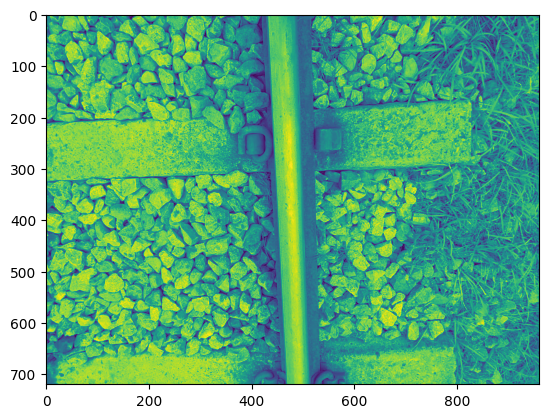

In [14]:
plt.imshow(norm_sampleimg)

In [15]:
!pip install mplcyberpunk
import tensorflow as tf
import cv2, pathlib, mplcyberpunk, math, os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
epochs = 30
batch_size = 32
img_height, img_width = 300, 300
input_shape = (img_height, img_width, 3)

def create_data_binary():
    data_gen = ImageDataGenerator(rescale=1.0 / 255)
    train_ds = data_gen.flow_from_directory('D:/Final main project/Railway track fault detection resized/test/', target_size=(img_height, img_width),
                                            class_mode='binary', batch_size=batch_size, subset='training')
    test_ds = data_gen.flow_from_directory('D:/Final main project/Railway track fault detection resized/test/', target_size=(img_height, img_width),
                                          class_mode='binary', batch_size=batch_size, shuffle=False)
    val_ds = data_gen.flow_from_directory('D:/Final main project/Railway track fault detection resized/valid/', target_size=(img_height, img_width),
                                          class_mode='binary', batch_size=batch_size, shuffle=False)

    return train_ds, test_ds, val_ds
train_ds, test_ds, val_ds = create_data_binary()

Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
